<a href="https://colab.research.google.com/github/muhhammdsallam/Speech-emotion-recognition/blob/master/Speech%20Emotion%20Recognition%20CONV%202D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 
## Speech Emotion Recogniton CONV 2D


---



# Loading Data

## Downloading Data

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [ ]:
! kaggle datasets  download dmitrybabko/speech-emotion-recognition-en

 99% 976M/987M [00:08<00:00, 167MB/s]
100% 987M/987M [00:08<00:00, 127MB/s]


In [ ]:
! unzip speech-emotion-recognition-en.zip

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

# Imports

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import numpy as np
from IPython.display import Audio, display
import librosa, librosa.display

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from numpy import *
from IPython.display import Audio
import IPython.display as ipd

## Reading Data

### Initiating data

In [ ]:
emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'
}

In [ ]:
from scipy.io import wavfile
import scipy.io

crema_path = '/content/Crema'

filenames = next(os.walk(crema_path), (None, None, []))[2] 

emotion_labels = []
emotion_audio_data = []
sampling_rate = 0
# data_paths = []
path_neutral = []
path_happy = []
path_sad = []
path_angry = []
path_fear = []
path_disgust = []


for i, audio_file in enumerate(filenames):

  # Read Label from name
  fragments = audio_file.split('_')
  emotion = fragments[2]

  # Read wav to np array
  audio_full_path = os.path.join(crema_path, audio_file)
  if emotion == 'NEU':
    path_neutral.append(audio_full_path)
  if emotion == 'HAP':
    path_happy.append(audio_full_path)  
  if emotion == 'SAD':
    path_sad.append(audio_full_path)
  if emotion == 'ANG':
    path_angry.append(audio_full_path)
  if emotion == 'FEA':
    path_fear.append(audio_full_path)
  if emotion == 'DIS':
    path_disgust.append(audio_full_path)      
  # data_paths.append(audio_full_path)
  samplerate, data = wavfile.read(audio_full_path)
  
  # data, samplerate = librosa.load(audio_full_path)

  # Appending data to global variables
  emotion_labels.append(emotion)
  emotion_audio_data.append(data)

In [ ]:
emotion_audio_data = np.array(emotion_audio_data)
emotion_audio_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(7442,)

In [ ]:
sampling_rate = samplerate
sampling_rate

16000

# Data Analytics

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


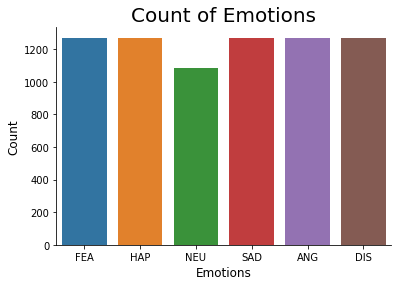

In [ ]:
plt.title('Count of Emotions', size=20)
sns.countplot(emotion_labels)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#Plotting Audio

In [ ]:
def create_waveplot(data, fs, mood):
    plt.figure(figsize=(10, 3))
    plt.title('Waveform for {} emotion'.format(emotions[mood]), size=15)
    time = np.linspace(0 , len(data) / fs , num = len(data))
    plt.plot(time, data)
    plt.show()

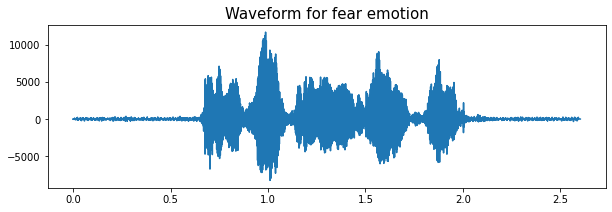

In [ ]:
create_waveplot(emotion_audio_data[0],sampling_rate,emotion_labels[0])

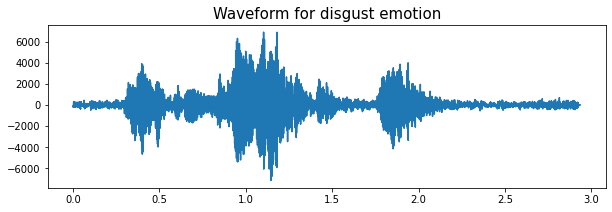

In [ ]:
create_waveplot(emotion_audio_data[50],sampling_rate,emotion_labels[50])

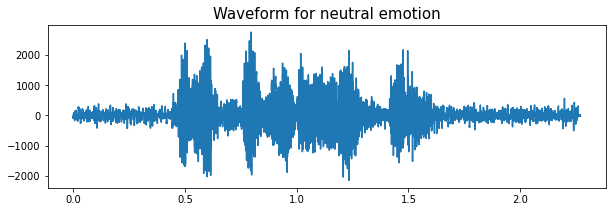

In [ ]:
create_waveplot(emotion_audio_data[20],sampling_rate,emotion_labels[20])

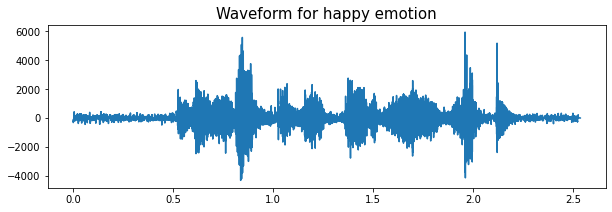

In [ ]:
create_waveplot(emotion_audio_data[500],sampling_rate,emotion_labels[500])

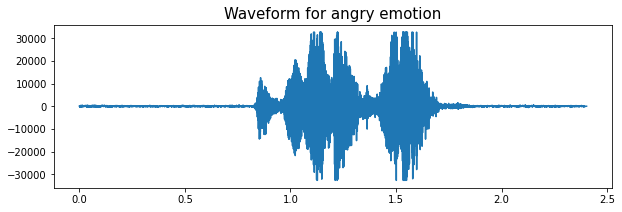

In [ ]:
create_waveplot(emotion_audio_data[1000],sampling_rate,emotion_labels[1000])

In [ ]:
#playing happy class
ipd.Audio(path_happy[8])

In [ ]:
#playing sad class
ipd.Audio(path_sad[8])

In [ ]:
#playing fear class
ipd.Audio(path_fear[8])

In [ ]:
#playing disgust class
ipd.Audio(path_disgust[8])

In [ ]:
#playing angry class
ipd.Audio(path_angry[8])

In [ ]:
#playing neutral class
ipd.Audio(path_neutral[8])

#Histogram

2.021225111382903
1.0


(array([  15.,  121.,  510.,  849., 1151., 1484., 1110.,  950.,  511.,
         741.]),
 array([0.76798186, 0.98118367, 1.19438549, 1.4075873 , 1.62078912,
        1.83399093, 2.04719274, 2.26039456, 2.47359637, 2.68679819,
        2.9       ]),
 <a list of 10 Patch objects>)

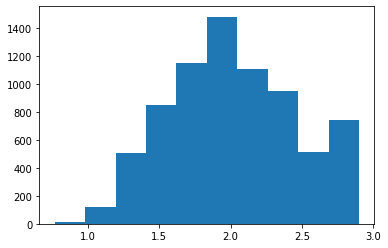

In [ ]:
# hist_arr = []
# ehst = 0
# for x in emotion_audio_data:
#   h = len(x) / sampling_rate
#   if h <= 3.1:
#     ehst += 1
#   hist_arr.append(h)

# avergae_time = np.mean(hist_arr)
# print(avergae_time)
# print(ehst / 7442)
# plt.hist(hist_arr)

In [ ]:
min_audio_secs = 1.75
max_audio_secs = 2.9

# Create data augmentation Functions

In [ ]:
def add_white_noise(data, factor):
    # Multiply the max element in a random between 0 and 1 and factor
    noise_amp = factor * np.random.uniform() * np.amax(data)
    # Add the noise to the data Normal part is a convention, 
    data = np.add(data, noise_amp * np.random.normal(size=data.shape[0]))
    return data

# Compress the Signal to 85%
def stretch(data):
    return librosa.effects.time_stretch(data, 0.85)

# Change the pitch of the sound ()
def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sampling_rate, 0.75)

def augment_sample(data):
  data= add_white_noise(data, 0.025)
  # data = stretch(data)
  # data = pitch(data, sampling_rate)
  return data

def pitch_sample(data):
  # data= add_white_noise(data, 0.025)
  # data = stretch(data)
  data = pitch(data, sampling_rate)
  return data

In [ ]:
augmented_data = []
pitched_data = []
for sample in emotion_audio_data:
  augmented_sample = augment_sample(sample)
  augmented_data.append(augmented_sample)

for sample in emotion_audio_data:
  pitched_sample = pitch_sample(sample.astype(float))
  pitched_data.append(pitched_sample)  

In [ ]:
augmented_data = np.array(augmented_data)
augmented_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(7442,)

In [ ]:
pitched_data = np.array(pitched_data)
pitched_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(7442,)

In [ ]:
emotion_labels_1 = emotion_labels

In [ ]:
emotion_labels = np.concatenate((emotion_labels,emotion_labels_1),axis = 0)

In [ ]:
emotion_labels_2 = emotion_labels_1

In [ ]:
emotion_labels = np.concatenate((emotion_labels,emotion_labels_2),axis = 0)

In [ ]:
emotion_labels = np.array(emotion_labels)
emotion_labels.shape

(22326,)

# Padding and feature extraction

Zero Padding

### Get the size of the max sample

In [ ]:
max_samples = 0
for s in emotion_audio_data:
  if s.shape[0] > max_samples:
    max_samples = s.shape[0]

print(max_samples)

80080


### Zero pad to the max sample

In [ ]:
emotion_audio_data[0]

array([-5.2410481e-03, -6.0549849e-03, -5.1724161e-03, ...,
       -5.3139722e-11, -7.6048730e-11,  0.0000000e+00], dtype=float32)

In [ ]:
for i, sample in enumerate(emotion_audio_data):
  audio_length = len(sample)
  if audio_length < max_samples:
    emotion_audio_data[i] = np.pad(sample, (max_samples - audio_length, 0))

In [ ]:
emotion_audio_data = np.array(emotion_audio_data)

In [ ]:
emotion_audio_data[0]
emotion_audio_data[1].shape

(63945,)

In [ ]:
# max_length = int(max_audio_secs * sampling_rate)

# #TODO: DROP MIN THAN THRESHOLD
# for i, sample in enumerate(emotion_audio_data):
#   audio_length = len(sample)

#   # if audio_length > max_length:
#   #   emotion_audio_data[i] = np.array(sample[:max_length])
#   # else:
#   if audio_length<max_length:
#     emotion_audio_data[i] = np.pad(sample, (max_length - audio_length, 0))

In [ ]:
# emotion_audio_data[1000].shape

(63945,)

##Old feature extraction

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = FRAME_LENGTH
array_length = math.ceil((max_audio_secs * sampling_rate * 3) / FRAME_LENGTH) + 1
# array_length = 171

In [ ]:
time_zcr_energy_feature_map = np.empty((emotion_audio_data.shape[0], array_length))
for i, sample in enumerate(emotion_audio_data):
  # sample = augment_sample(sample)
  zcr = librosa.feature.zero_crossing_rate(y=sample.astype(float), frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
  energy = librosa.feature.rms(y=sample.astype(float), frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
  spc = librosa.feature.spectral_centroid(y=sample.astype(float), sr=sampling_rate, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)
  s = np.concatenate((zcr, energy, spc), axis =1)
  time_zcr_energy_feature_map[i] = s

In [ ]:
time_zcr_energy_feature_map.shape

(7442, 189)

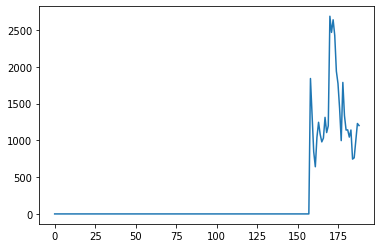

In [ ]:
x= time_zcr_energy_feature_map[18]
plt.plot(x)

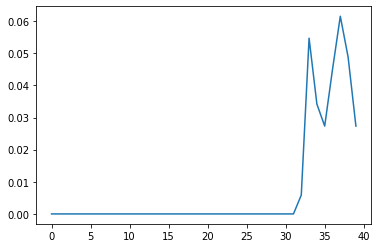

In [ ]:
plt.plot(x[0:40])

#Generate mel-spectrogram 

In [ ]:
def generate_mel_spectrogram(data,fs):
  dimension = 128
  hop_length = math.floor(data.shape[0]/dimension)
  mel = librosa.feature.melspectrogram(y=data.astype(float), sr=fs, n_fft = 4096, hop_length = hop_length, n_mels = dimension)
  mel_spectrogram = librosa.power_to_db(mel, ref=np.max)
  return mel_spectrogram

In [ ]:
total_mel_spectrograms = []
for i in range(emotion_audio_data.shape[0]):
  mel = []
  mel = generate_mel_spectrogram(emotion_audio_data[i],sampling_rate)
  total_mel_spectrograms.append(mel)
for i in range(augmented_data.shape[0]):
  mel = []
  mel = generate_mel_spectrogram(augmented_data[i],sampling_rate)
  total_mel_spectrograms.append(mel)
for i in range(augmented_data.shape[0]):
  mel = []
  mel = generate_mel_spectrogram(pitched_data[i],sampling_rate)
  total_mel_spectrograms.append(mel)    
total_mel_spectrograms = np.array(total_mel_spectrograms)

In [ ]:
del augmented_data
del pitched_data

In [ ]:
total_mel_spectrograms.shape

(22326, 128, 129)

In [ ]:
emotion_labels.shape

(22326,)

#Plotting mel spectrogram

/usr/local/lib/python3.7/dist-packages/librosa/core/convert.py:306: RuntimeWarning: divide by zero encountered in true_divide
  return np.asanyarray(samples) / float(sr)
/usr/local/lib/python3.7/dist-packages/librosa/core/convert.py:306: RuntimeWarning: invalid value encountered in true_divide
  return np.asanyarray(samples) / float(sr)


ValueError: ignored

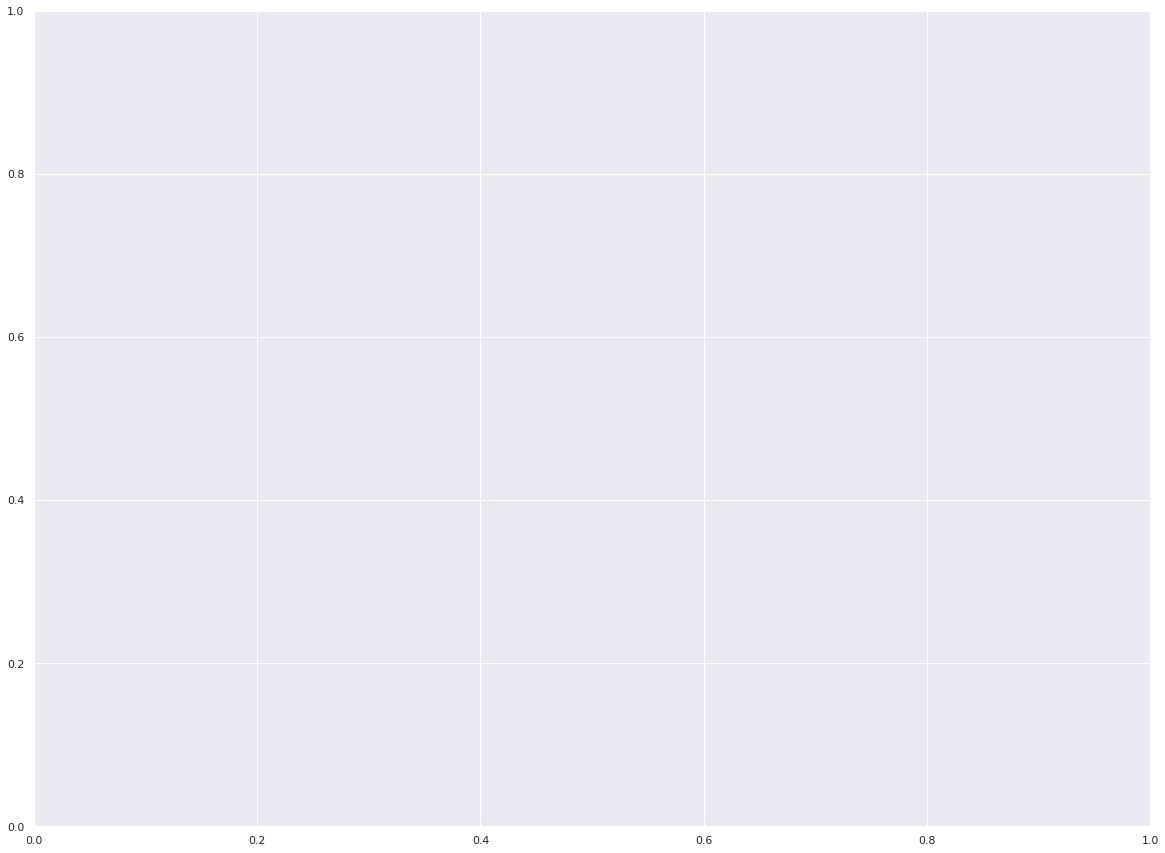

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(total_mel_spectrograms[10], x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

#2D model


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(total_mel_spectrograms, emotion_labels , test_size=0.3)
x_train.shape

(15628, 128, 129)

In [ ]:
model2D = models.Sequential([
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(total_mel_spectrograms.shape[1], total_mel_spectrograms.shape[2], 1)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),

    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),

    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

In [ ]:
model2D.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
emotions_numeric = {
    'NEU':0,
    'HAP':1,
    'SAD':2,
    'ANG':3,
    'FEA':4,
    'DIS':5
}

In [ ]:
y_train_numeric = []
for x in y_train:
  lab = emotions_numeric[x]
  y_train_numeric.append(lab)
y_train_numeric = np.array(y_train_numeric)

In [ ]:
history_2d = model2D.fit(x_train, y_train_numeric, epochs=50, validation_split=0.05,  batch_size = 64, shuffle = True)

Epoch 1/50
232/232 [==============================] - 23s 45ms/step - loss: 1.6640 - accuracy: 0.3350 - val_loss: 1.6425 - val_accuracy: 0.3120
Epoch 2/50
232/232 [==============================] - 9s 39ms/step - loss: 1.4615 - accuracy: 0.4052 - val_loss: 2.0983 - val_accuracy: 0.3031
Epoch 3/50
232/232 [==============================] - 9s 40ms/step - loss: 1.4143 - accuracy: 0.4418 - val_loss: 1.7328 - val_accuracy: 0.3312
Epoch 4/50
232/232 [==============================] - 9s 40ms/step - loss: 1.3257 - accuracy: 0.4868 - val_loss: 1.7683 - val_accuracy: 0.3491
Epoch 5/50
232/232 [==============================] - 9s 40ms/step - loss: 1.2633 - accuracy: 0.5154 - val_loss: 1.3213 - val_accuracy: 0.4655
Epoch 6/50
232/232 [==============================] - 9s 40ms/step - loss: 1.1865 - accuracy: 0.5472 - val_loss: 1.6306 - val_accuracy: 0.4182
Epoch 7/50
232/232 [==============================] - 9s 40ms/step - loss: 1.1316 - accuracy: 0.5694 - val_loss: 1.5189 - val_accuracy: 0.399

In [ ]:
y_test_numeric = []
for x in y_test:
  lab = emotions_numeric[x]
  y_test_numeric.append(lab)
y_test_numeric = np.array(y_test_numeric)

210/210 - 3s - loss: 1.1006 - accuracy: 0.7956 - 3s/epoch - 15ms/step


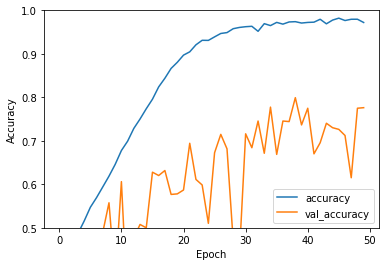

In [ ]:
plt.plot(history_2d.history['accuracy'], label='accuracy')
plt.plot(history_2d.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2D.evaluate(x_test,  y_test_numeric, verbose=2)

#Generate predictions

In [ ]:
test_predictions = model2D.predict(x_test)
print("predictions shape:", test_predictions.shape)
print(test_predictions)

predictions shape: (6698, 6)
[[1.50231252e-04 9.78856588e-06 8.96162152e-01 4.83696067e-06
  1.03354454e-01 3.18634149e-04]
 [1.23143731e-10 1.17882957e-19 1.00000000e+00 3.47468995e-17
  8.44512515e-10 9.81177153e-11]
 [8.10211431e-03 7.23177314e-01 7.00829178e-03 7.72317052e-02
  6.06993809e-02 1.23781160e-01]
 ...
 [3.09637603e-14 6.70358777e-12 1.40044205e-23 1.00000000e+00
  2.62717348e-14 6.89469505e-14]
 [1.26299942e-02 9.82934296e-01 5.92579127e-05 1.90382020e-03
  2.18431372e-03 2.88365321e-04]
 [1.05788953e-27 2.61643680e-18 1.00590298e-16 1.34625841e-22
  1.00000000e+00 1.29094291e-19]]


#Confusion matrix

Confusion Matrix


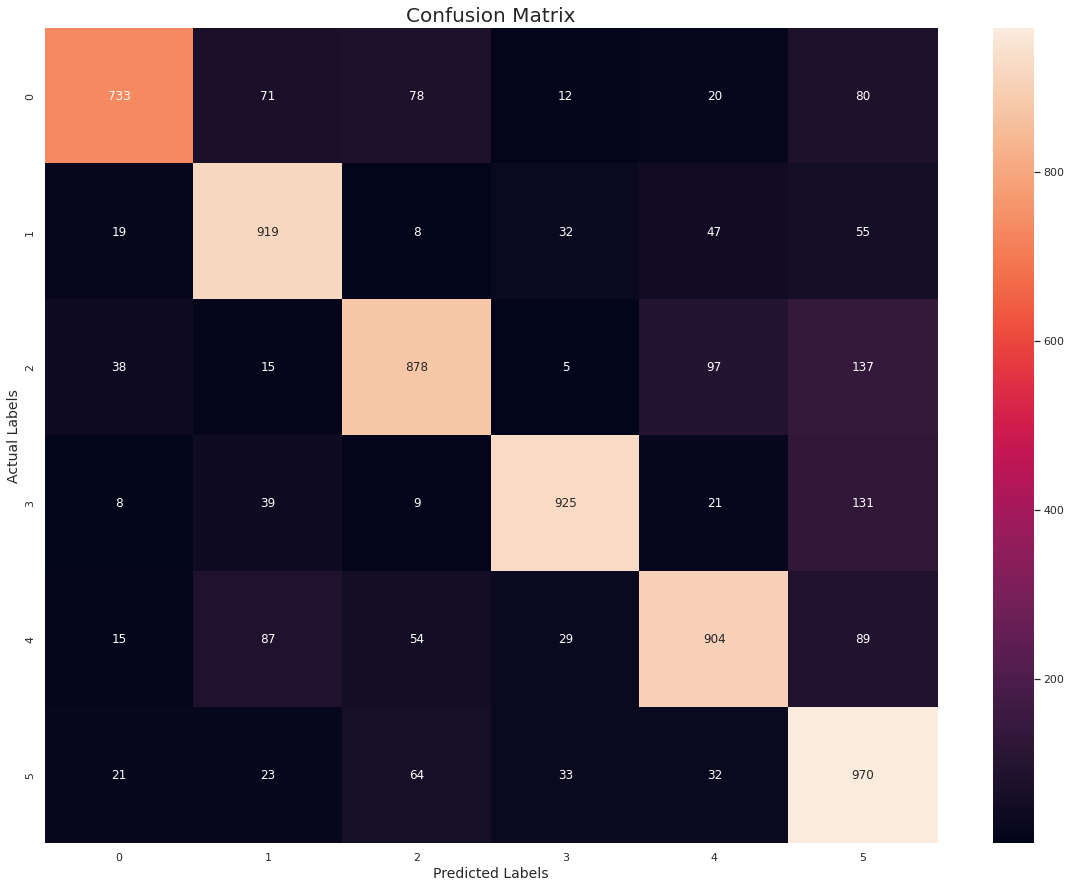

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Y_pred = np.argmax(test_predictions,axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_numeric, Y_pred)
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(cm,annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.figure(figsize=(20,20))
plt.show()

#F Score

In [ ]:
f1_score(y_test_numeric, Y_pred, average = 'macro')

0.7975724224799454